# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#URL for weather API call, units=imperial 
url='http://api.openweathermap.org/data/2.5/weather?'
units="imperial"

weather_api_key = ""
city="Modesto"
query_url =f'{url}appid={weather_api_key}&units={units}&q='
response=requests.get(query_url+city).json()
display(response)

print('Beginning Data Retrieval')
print('------------------------')


    
    

{'coord': {'lon': -120.9969, 'lat': 37.6391},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 54,
  'feels_like': 49.46,
  'temp_min': 52,
  'temp_max': 55.4,
  'pressure': 1021,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 3.36, 'deg': 327, 'gust': 4.61},
 'clouds': {'all': 1},
 'dt': 1614054546,
 'sys': {'type': 1,
  'id': 4949,
  'country': 'US',
  'sunrise': 1614005073,
  'sunset': 1614045039},
 'timezone': -28800,
 'id': 5373900,
 'name': 'Modesto',
 'cod': 200}

Beginning Data Retrieval
------------------------


In [5]:
#Create lists to hold information 
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lon=[]
city_data=[]
country=[]
date=[]

In [12]:
# #Set starter at 0 
i=0

# #Loop through cities and request data on each
for city in cities:
    response=requests.get(query_url+city).json()
    try:
        
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']["country"])
        date.append(response['dt'])
        city_data.append(city)
        
    
        i=i+1
        print(f'{i}:{city}')
    except (KeyError, IndexError):
        print("Data not available")
        
print("------------")
    
print('Completed Data Retrieval')
print('------------------------')

Data not available
1:ponta do sol
2:morgan city
3:duku
4:caborca
5:punta arenas
Data not available
6:mataura
7:bredasdorp
8:tessalit
9:tasiilaq
10:ahipara
11:carnarvon
12:avarua
13:mar del plata
14:nanortalik
15:qarqin
16:castro
17:bitung
18:bambous virieux
19:talnakh
20:shingu
21:machali
22:kapaa
23:busselton
24:port elizabeth
Data not available
25:lithgow
26:barrow
27:san cristobal
28:tabas
29:bengkulu
30:beringovskiy
31:rikitea
32:bluff
33:poum
34:pandan
35:atuona
36:saskylakh
37:mahebourg
38:mareeba
39:east london
Data not available
40:sayan
Data not available
41:hilo
42:lagoa
43:prince rupert
44:tazovskiy
45:havelock
46:airai
47:bubaque
48:vila franca do campo
49:kaitangata
50:okakarara
51:chuy
52:rawson
53:myitkyina
54:turkmenabat
55:ushuaia
56:severo-kurilsk
57:nova praha
58:hay river
59:adolfo lopez mateos
60:sao filipe
61:asyut
62:upernavik
Data not available
63:ancud
Data not available
Data not available
64:toamasina
65:wattegama
66:qaqortoq
67:provideniya
68:half moon bay
69

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
raw_df=pd.DataFrame({'City':city_data,'Lat':lat,'Lng':lon,"Max Temp":temperature,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,
                     "Country":country,"Date":date})


In [14]:
len(raw_df)

569

In [15]:
raw_df.to_csv("WeatherPy.csv")


In [16]:
raw_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,60.01,84,36,1.01,PT,1614054571
1,morgan city,29.6994,-91.2068,50.00,87,1,6.93,US,1614054571
2,duku,11.2361,4.9073,70.93,11,0,7.87,NG,1614054572
3,caborca,30.5838,-111.1010,64.99,17,79,5.01,MX,1614054573
4,punta arenas,-53.1500,-70.9167,44.60,57,75,6.91,CL,1614054470


In [17]:
raw_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.591186,15.129421,49.660896,72.165202,47.008787,8.116801,1.614055e+09
std,32.790580,90.937531,32.912307,22.023534,39.409840,5.577580,1.762774e+02
min,-54.800000,-175.200000,-34.600000,1.000000,0.000000,0.160000,1.614054e+09
25%,-6.433300,-65.102300,33.800000,63.000000,1.000000,4.000000,1.614055e+09
50%,27.976900,20.441700,59.000000,78.000000,40.000000,6.910000,1.614055e+09
75%,48.568200,91.390300,75.200000,88.000000,90.000000,10.380000,1.614055e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,34.520000,1.614055e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
humidity_data=raw_df.loc[raw_df["Humidity"]>100]
humidity_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.
#no cities that have humidity > 100%.

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis:The plot shows the general relationship between temperature and the equator/poles. As temperature increases, 
latitude decreases and vice versa. Temperatures in cities closer to the equator are generally warmer and inversely, cities closer to the poles are colder. 

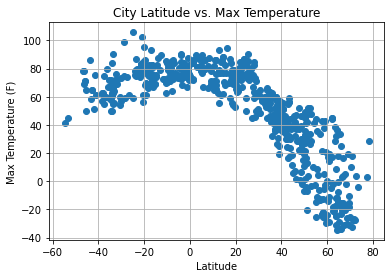

In [82]:
#Temperature (F) vs. Latitude
plt.scatter(raw_df["Lat"],raw_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.show()

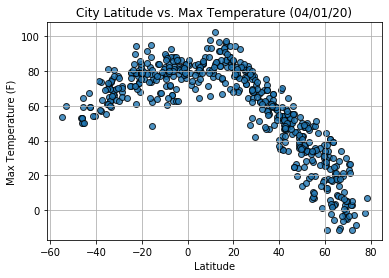

## Latitude vs. Humidity Plot

Analysis: There does not seem to be any relationship between humidity and latitidue in the below plot. 

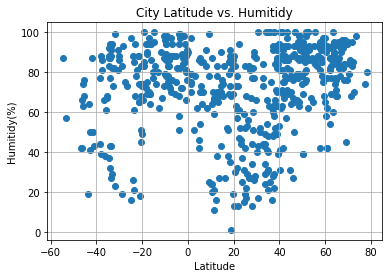

In [83]:
#Humidity (%) vs. Latitude
plt.scatter(raw_df["Lat"],raw_df["Humidity"])
plt.title("City Latitude vs. Humitidy")
plt.xlabel("Latitude")
plt.ylabel("Humitidy(%)")
plt.grid (b=True,which="major",axis="both")
plt.show()

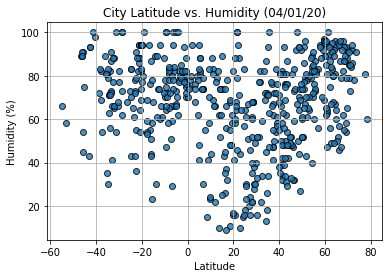

## Latitude vs. Cloudiness Plot

There doesn't really seem to be a clear relationship between cloudiness and latitude. This plot shows that cloudiness is more compiled in certain areas.

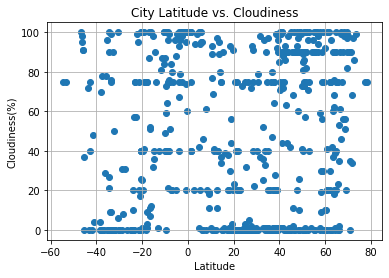

In [84]:
#Cloudiness (%) vs. Latitude
plt.scatter(raw_df["Lat"],raw_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (b=True,which="major",axis="both")
plt.show()

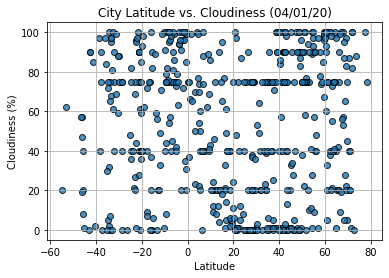

## Latitude vs. Wind Speed Plot

The wind speed in cities does not seem to have a direct relationship with the latitude. The majority of the cities seem to have winds of under 15 mph. 

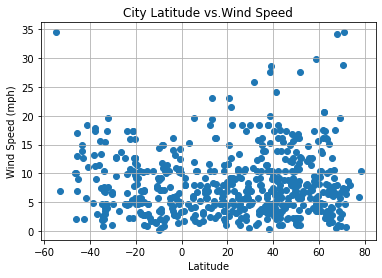

In [85]:
#Wind Speed (mph) vs. Latitude
plt.scatter(raw_df["Lat"],raw_df["Wind Speed"])
plt.title('City Latitude vs.Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which="major",axis="both")
plt.show()

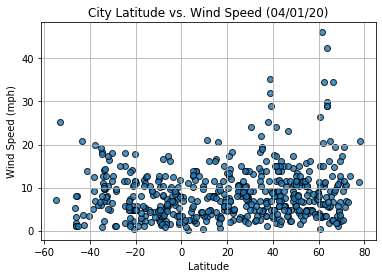

## Linear Regression

In [25]:
# Add the linear regression equation and line to plot
def linear_plot (x,y):
    relation=st.pearsonr(x,y)
    #print(f' The ravlue is {rvalue**2}')
          
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f' The ravlue is {rvalue**2}')
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
#Linear regression for Northern Hemisphere (<=0 degrees latitude) 
northern_hem=raw_df.loc[raw_df["Lat"]>=0]

The below plot shows a high negative correlation. You can see as the Max Temperature increases, latitude decreases and vice versa. 

 The ravlue is 0.7529618489489434


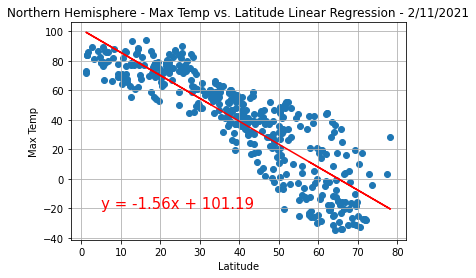

In [73]:
#Northern Hemisphere - Temperature (F) vs. Latitude
line_eq=linear_plot(x=northern_hem["Lat"],y=(northern_hem["Max Temp"]))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
southern_hem=raw_df.loc[raw_df["Lat"]<0]
southern_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,punta arenas,-53.1500,-70.9167,44.60,57,75,6.91,CL,1614054470
5,mataura,-46.1927,168.8643,78.01,42,98,10.00,NZ,1614054577
6,bredasdorp,-34.5322,20.0403,50.00,87,27,2.10,ZA,1614054578
9,ahipara,-35.1667,173.1667,72.12,67,96,13.27,NZ,1614054583
10,carnarvon,-24.8667,113.6333,105.80,16,0,12.66,AU,1614054584


The below plot shows a low positive correlation, as oppose to the Northern Hemisphere. The slope is positive, depicting that which each degree of latitude, the temperature gets warmer. 

 The ravlue is 0.24141949633633328


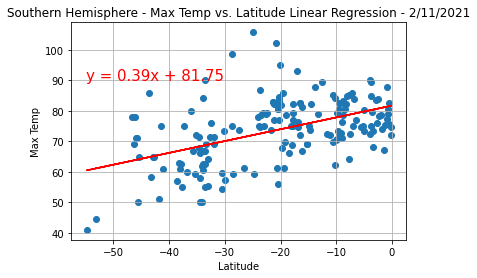

In [74]:
#Southern Hemisphere - Temperature (F) vs. Latitude
line_eq=linear_plot(x=southern_hem["Lat"],y=(southern_hem["Max Temp"]))
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.6082708688906918


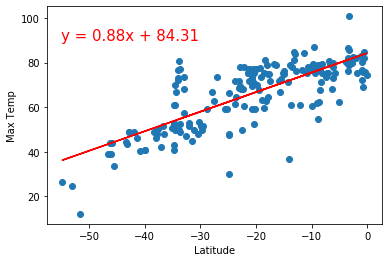

In [26]:
#Output example 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The below graph also shows a low positive correlation.  

 The ravlue is 0.15967522349656016


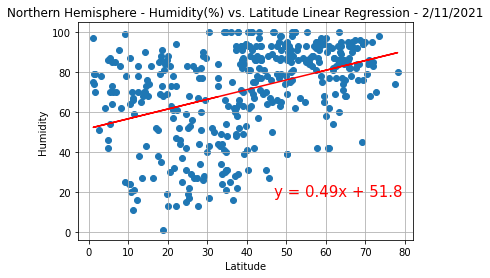

In [75]:
#Northern Hemisphere - Humidity (%) vs. Latitude
line_eq=linear_plot(northern_hem["Lat"],(northern_hem["Humidity"]))
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(47,18),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.000543987878808455


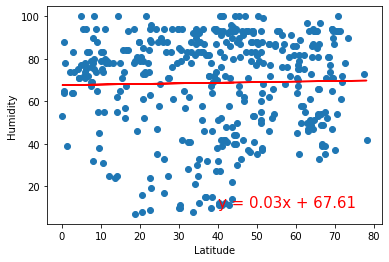

In [27]:
#Output example 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Low positive correlation.

 The ravlue is 0.14408836849507264


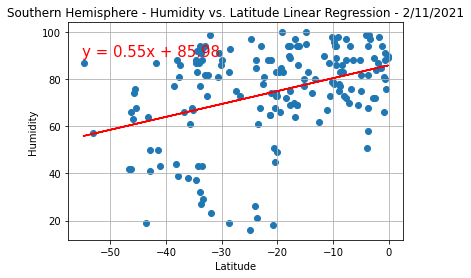

In [76]:
#Southern Hemisphere - Humidity (%) vs. Latitude
line_eq=linear_plot(southern_hem["Lat"],(southern_hem["Humidity"]))
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The below plot shows a positive slope, but there does not seem to be a clear trend making it difficult to assume cloudiness has a concise correlation with the latitude in the northern hemisphere. 

 The ravlue is 0.04781093012938921


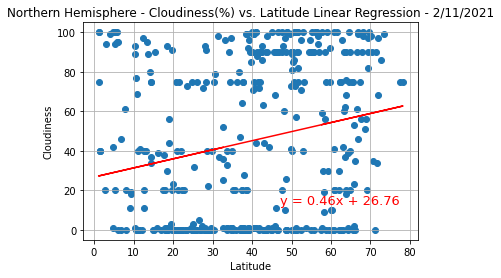

In [77]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
line_eq=linear_plot(northern_hem["Lat"],(northern_hem["Cloudiness"]))
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(47,13),fontsize=13,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.0020898727664228514


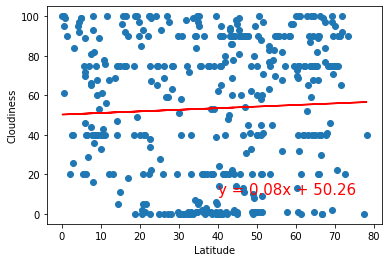

In [29]:
#Example Output 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The same can be said about cloudiness in the southern hemisphere, although we can see a difference in the density of the graph. There are fewer cities as data. 

 The ravlue is 0.12484196435294322


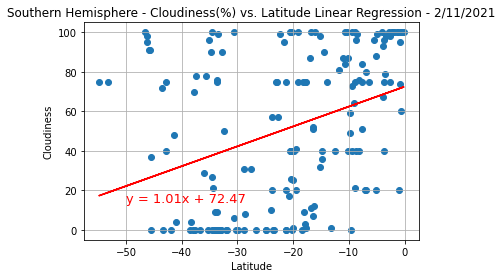

In [78]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
line_eq=linear_plot(southern_hem["Lat"],(southern_hem["Cloudiness"]))
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,14),fontsize=13,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.0035263772085582894


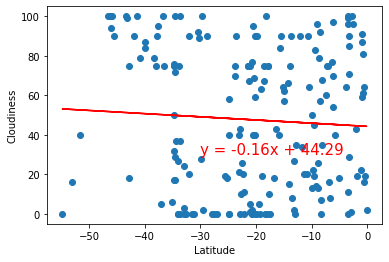

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The slope of the plot in the Northern Hemisphere shows a positive slope, although it is very low based off of the r-value. Another thing to note, is that the cluster of cities is below the 10 mph wind speed 

 The ravlue is 0.005299856661816904


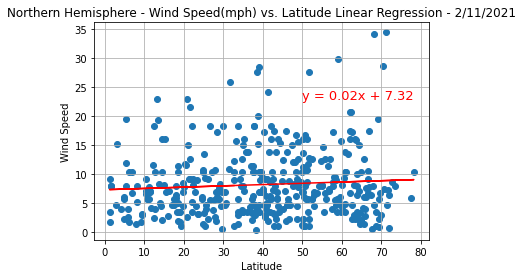

In [79]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
line_eq=linear_plot(northern_hem["Lat"],(northern_hem["Wind Speed"]))
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(50,23),fontsize=13,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.04019723576144484


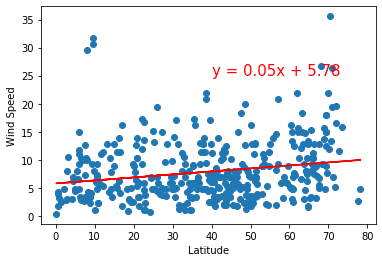

In [31]:
#Example Output 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Low negative correlation, with not much to say about the linear regression between the two variables in the Southern Hemisphere. 

 The ravlue is 0.05622294829830373


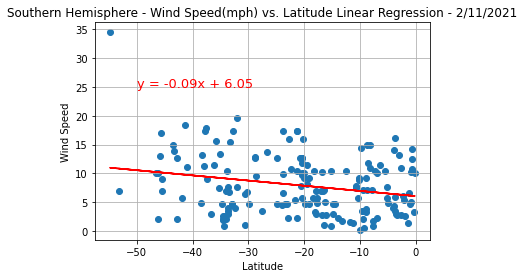

In [80]:
#Southern Hemisphere - Wind Speed (%) vs. Latitude
line_eq=linear_plot(southern_hem["Lat"],(southern_hem["Wind Speed"]))
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression - 2/11/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,25),fontsize=13,color="red")
plt.grid (b=True,which="major",axis="both")
plt.show()

The r-value is: 0.017128274759839232


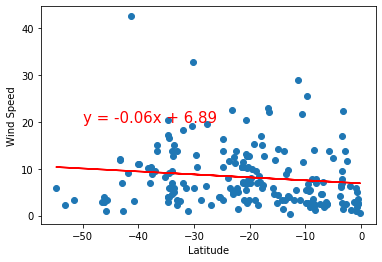

In [32]:
#Example Output 